In [200]:
import seaborn as sns
import pandas as pd
import numpy as np
import yaml
from pandas_datareader.data import DataReader
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [152]:
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]
all_stocks = first_table['Symbol'].values.tolist()

In [77]:
def calc_stocks(stocks, dates):
    panel_data = DataReader(stocks, 'yahoo', dates[0], dates[1])
    panel_data = panel_data.resample('BM').last()
    df = pd.DataFrame(index=panel_data.index, columns=stocks)
    for i in stocks:
        df[i] = panel_data[[('Adj Close', i)]]
    return df

def get_full_data(stocks, dates):
    panel_data = DataReader(stocks, 'yahoo', dates[0], dates[1])
    panel_data = panel_data.resample('BM').last()
    return panel_data

In [119]:
dates = ['2018-10-01', '2020-01-01']
df = calc_stocks(stocks, dates)
df.dropna(inplace=True)
df_pct = df.pct_change().iloc[1:].mean(axis=0)
list_50 = df_pct.sort_values(ascending=False).iloc[:50].index.values.tolist()
print(list_50)
list_100 = df_pct.sort_values(ascending=False).iloc[:104].index.values.tolist()
print(list_100)
list_all = df.index.values.tolist()
print(len(list_all))
print(list_all)

/Users/bmartins/.pyenv/versions/nlp_bert_venv/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BRK.B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/bmartins/.pyenv/versions/nlp_bert_venv/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BF.B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/bmartins/.pyenv/versions/nlp_bert_venv/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'CARR', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/bmartins/.pyenv/versions/nlp_bert_venv/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'CEG', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/bmartins/.pyenv/versions/nlp_bert_venv/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Fail

['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ANET']
['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 

In [ ]:
dates = ['2018-10-01', '2020-01-01']
df = calc_stocks(stocks, dates)
df2 = df.dropna(axis=1)
df2 = df2[sorted(df.columns)]#.reset_index()
df2 = df2.set_index('Date').reset_index()
list_full = df2.columns.values.tolist()
#list_full = df2.index.values.tolist()
#print(len(list_full))
print(list_full)
df2.to_csv('../sp500.csv')

### Pool rebalancing

In [126]:
dates = ['2018-10-01', '2020-01-01']
df = calc_stocks(stocks, dates)
#df.dropna(inplace=True)
#df_pct = df.pct_change().iloc[1:].mean(axis=0)
# list_50 = df_pct.sort_values(ascending=False).iloc[:50].index.values.tolist()
# print(list_50)
# list_100 = df_pct.sort_values(ascending=False).iloc[:104].index.values.tolist()
# print(list_100)
# list_all = df.index.values.tolist()
# print(len(list_all))
# print(list_all)

/Users/bmartins/.pyenv/versions/nlp_bert_venv/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BRK.B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/bmartins/.pyenv/versions/nlp_bert_venv/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BF.B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/bmartins/.pyenv/versions/nlp_bert_venv/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'CARR', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/bmartins/.pyenv/versions/nlp_bert_venv/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'CEG', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/bmartins/.pyenv/versions/nlp_bert_venv/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Fail

In [151]:
print(df.shape)
df2 = df.dropna(axis=1)
print(df2.shape)
display(df2.head())
df_pct = df2.pct_change().iloc[1:]
df_pct
pool = []
for i in df_pct.iterrows():
    pool.append(pd.Series(i)[1].sort_values().iloc[:50].index.values.tolist())
    #print(df.sort_values(by=i[0], ascending=False, axis=1))

    #pool.append(df_pct.sort_values(ascending=False).iloc[:50])
print(pool)
df2.to_csv('../sp500_50.csv')

(15, 478)
(15, 478)


,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-31,169.189560,42.892925,65.515373,64.982483,341.200012,150.935303,67.724266,42.567448,245.759995,135.704437,...,143.160004,267.294617,95.906380,45.488869,63.100281,85.057991,166.300003,107.577774,43.294865,88.317963
2018-11-30,186.156418,44.635773,70.371513,78.688484,332.679993,157.542694,48.922321,41.765774,250.889999,138.850281,...,159.449997,296.963165,105.051804,48.681725,70.220490,87.121208,179.800003,110.826225,45.049728,92.088135
2018-12-31,170.595657,40.226837,68.736954,76.952278,325.040009,135.029770,45.675869,37.182613,226.240005,124.200813,...,151.860001,267.005829,94.978737,46.083542,64.197174,86.837791,159.229996,98.468773,37.717342,83.916245
2019-01-31,179.334045,45.296196,69.676277,67.841179,351.070007,147.037933,46.333012,40.749306,247.820007,132.460693,...,162.789993,279.327332,118.120857,48.973686,68.565521,88.783897,173.600006,104.013092,44.059116,84.691399
2019-02-28,186.965637,49.148167,74.106216,66.953979,334.500000,154.535873,41.330925,38.893440,262.500000,144.954620,...,172.020004,289.496338,122.229271,51.312008,72.933411,89.675606,200.509995,117.835945,47.594894,92.623840


[['ATVI', 'GE', 'NVDA', 'MTCH', 'EIX', 'AAPL', 'DVN', 'MO', 'SWKS', 'GS', 'TTWO', 'TGT', 'RL', 'BKR', 'DXC', 'J', 'SLB', 'MRO', 'CF', 'ROST', 'VLO', 'TJX', 'QRVO', 'FTNT', 'TWTR', 'BR', 'SYF', 'HAL', 'LH', 'CAG', 'PENN', 'TYL', 'LUMN', 'IR', 'PVH', 'PSX', 'TPR', 'BBY', 'EA', 'META', 'QCOM', 'APA', 'MPC', 'JKHY', 'ALL', 'HES', 'APTV', 'DGX', 'KHC', 'PARA'], ['CAG', 'FDX', 'WAB', 'SIVB', 'APA', 'HES', 'DISH', 'BBWI', 'DVA', 'PM', 'HWM', 'CTLT', 'AAL', 'WRK', 'ALB', 'C', 'AMP', 'WBD', 'LUMN', 'KEY', 'PARA', 'WBA', 'SLB', 'VTRS', 'CNC', 'MOS', 'F', 'LNC', 'NVDA', 'CVS', 'CFG', 'CCL', 'TXT', 'RF', 'STZ', 'DAL', 'ULTA', 'CAH', 'IVZ', 'MU', 'CZR', 'MNST', 'WDC', 'NCLH', 'BBY', 'HBAN', 'DFS', 'WY', 'ALK', 'MOH'], ['RMD', 'QCOM', 'ABBV', 'MKC', 'TSLA', 'ILMN', 'KMX', 'CBOE', 'BMY', 'AMGN', 'JNPR', 'CLX', 'CME', 'MDT', 'MRK', 'KMB', 'CHD', 'D', 'NEM', 'WAB', 'BRO', 'LW', 'HSIC', 'VZ', 'HSY', 'DAL', 'FFIV', 'HRL', 'BEN', 'MO', 'CTXS', 'ORLY', 'CF', 'EIX', 'INTC', 'RE', 'DD', 'MCD', 'CVS', 'POOL',

In [ ]:
dates = ['2018-10-01', '2020-01-01']
df_all = get_full_data(stocks, dates)

In [88]:
unit_prices = df.iloc[0,1:].values
df.iloc[0,:].sort_index()

A        63.225479
AAL      34.426765
AAP     155.522263
AAPL     53.088074
ABBV     64.982483
           ...    
YUM      85.057991
ZBH     107.577774
ZBRA    166.300003
ZION     43.294865
ZTS      88.317963
Name: 0, Length: 494, dtype: object

In [118]:
df_volume = df_all.loc[:, df_all.columns.get_level_values(0) == 'Volume'].dropna(axis=1)
#df_volume = df_volume.set_index('Date')
print(df_volume.shape)
df_volume.columns = df_volume.columns.droplevel()
df_volume = 1000 * df_volume.div(df_volume.sum(axis=1), axis=0)
#print(df_volume.apply(lambda x: np.floor(x), axis=0).astype(int).iloc[0,:].sort_values(ascending=False))
print(df_volume.apply(lambda x: np.floor(x), axis=0).astype(int).iloc[0,:].sort_index().to_dict())
shares = df_volume.apply(lambda x: np.floor(x), axis=0).astype(int).iloc[0,:].sort_index().values


(15, 493)
{'A': 1, 'AAL': 3, 'AAP': 0, 'AAPL': 45, 'ABBV': 4, 'ABC': 0, 'ABMD': 0, 'ABT': 2, 'ACN': 0, 'ADBE': 1, 'ADI': 1, 'ADM': 1, 'ADP': 1, 'ADSK': 0, 'AEE': 0, 'AEP': 0, 'AES': 2, 'AFL': 1, 'AIG': 3, 'AIZ': 0, 'AJG': 0, 'AKAM': 1, 'ALB': 0, 'ALGN': 0, 'ALK': 0, 'ALL': 0, 'ALLE': 0, 'AMAT': 3, 'AMCR': 0, 'AMD': 32, 'AME': 0, 'AMGN': 1, 'AMP': 0, 'AMT': 1, 'AMZN': 55, 'ANET': 1, 'ANSS': 0, 'ANTM': 0, 'AON': 0, 'AOS': 1, 'APA': 1, 'APD': 0, 'APH': 2, 'APTV': 1, 'ARE': 0, 'ATO': 0, 'ATVI': 2, 'AVB': 0, 'AVGO': 0, 'AVY': 0, 'AWK': 0, 'AXP': 1, 'AZO': 0, 'BA': 1, 'BAC': 27, 'BALL': 1, 'BAX': 4, 'BBWI': 1, 'BBY': 0, 'BDX': 0, 'BEN': 1, 'BIIB': 0, 'BIO': 0, 'BK': 1, 'BKNG': 0, 'BKR': 2, 'BLK': 0, 'BMY': 2, 'BR': 0, 'BRO': 0, 'BSX': 2, 'BWA': 0, 'BXP': 0, 'C': 6, 'CAG': 2, 'CAH': 1, 'CAT': 3, 'CB': 0, 'CBOE': 0, 'CBRE': 0, 'CCI': 0, 'CCL': 1, 'CDAY': 0, 'CDNS': 0, 'CDW': 1, 'CE': 0, 'CF': 1, 'CFG': 1, 'CHD': 1, 'CHRW': 1, 'CHTR': 0, 'CI': 0, 'CINF': 0, 'CL': 2, 'CLX': 0, 'CMA': 0, 'CMCSA':

In [100]:
np.dot((shares).astype(int), unit_prices)

76889.03008794785

In [ ]:
dates = ['2021-01-01', '2022-05-01']
df = calc_stocks(stocks, dates)
df_pct = df.pct_change().iloc[1:].mean(axis=0)
list_50 = df_pct.sort_values(ascending=False).iloc[:50].index.values.tolist()
print(list_50)

In [67]:
list_100 = df_pct.sort_values(ascending=False).iloc[:101].index.values.tolist()
print(list_100)

['ENPH', 'AMD', 'SEDG', 'ETN', 'PAYC', 'LRCX', 'TER', 'KLAC', 'GNRC', 'AMAT', 'TDG', 'CDAY', 'MKTX', 'CMG', 'DXCM', 'CPRT', 'KEYS', 'EPAM', 'MTCH', 'NXPI', 'WDC', 'CZR', 'MSCI', 'ANSS', 'MCHP', 'NVR', 'QRVO', 'QCOM', 'MCO', 'MRNA', 'XRAY', 'MLM', 'TGT', 'MAS', 'CDW', 'ZBRA', 'STX', 'AZO', 'GPN', 'EW', 'TSN', 'PHM', 'WYNN', 'NOW', 'CDNS', 'TFX', 'IR', 'EQIX', 'SWKS', 'HWM', 'LDOS', 'TDY', 'HLT', 'SNPS', 'URI', 'APD', 'SBUX', 'DHR', 'MU', 'GRMN', 'FBHS', 'CBRE', 'EL', 'NLOK', 'NWL', 'CHTR', 'AVGO', 'WHR', 'FAST', 'FMC', 'PCAR', 'CTAS', 'SPGI', 'MA', 'ADI', 'MTD', 'AME', 'AMT', 'RMD', 'NEM', 'SHW', 'MSFT', 'ALLE', 'SBAC', 'SWK', 'CTLT', 'ODFL', 'AVY', 'DHI', 'ZTS', 'ADSK', 'SO', 'LVS', 'DOV', 'POOL', 'BALL', 'ITW', 'FISV', 'LYB', 'FLT', 'PLD']


In [64]:
select_stocks = ['MRO', 'DVN', 'NUE', 'APA', 'OXY', 'AAPL', 'MOS', 'COP', 'EOG', 'CF', 'FANG', 'VLO', 'HAL', 'MPC', 'FTNT', 'PXD', 'XOM', 'HES', 'CVX', 'IT', 'SLB', 'ADM', 'MCK', 'AZO', 'EXR', 'BBWI', 'BKR', 'ANTM', 'PWR', 'OKE', 'IRM', 'WMB', 'PSA', 'FCX', 'NVDA', 'LYV', 'CTRA', 'DLTR', 'WRB', 'KR', 'GD', 'AIG', 'EXC', 'ANET', 'PLD', 'HPQ', 'SBNY', 'CPT', 'KIM', 'NOC']
df.loc[:,select_stocks]

,MRO,DVN,NUE,APA,OXY,AAPL,MOS,COP,EOG,CF,...,GD,AIG,EXC,ANET,PLD,HPQ,SBNY,CPT,KIM,NOC
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-29,7.112206,15.728911,47.873737,14.151438,20.031832,131.539673,25.693972,38.526295,48.071228,40.263241,...,143.141510,36.531433,28.878885,76.889999,101.166458,23.712605,164.428452,99.719582,15.998172,280.462219
2021-02-26,10.940664,20.583281,58.768867,19.552372,26.572634,121.054382,29.098721,50.515999,60.900291,44.366367,...,159.526489,42.883453,26.822063,69.959999,97.117844,28.223259,217.333420,101.672005,17.761747,286.781372
2021-03-31,10.526692,21.041765,79.267181,17.738848,26.591555,121.942871,31.336246,51.448425,68.418503,44.464355,...,177.180084,45.388451,30.809690,75.472504,104.556442,31.131643,225.057663,108.101173,18.327692,318.226440
2021-04-30,11.098368,22.515169,81.232338,19.849133,25.332899,131.237091,34.875324,49.670990,69.854324,47.648777,...,186.844147,47.588627,31.654949,78.792503,114.943039,33.445683,250.901306,118.497223,20.527016,348.511200
2021-05-31,11.975268,25.577541,101.258972,20.643095,25.932257,124.610001,35.827011,54.560131,76.209892,52.390568,...,186.529861,51.900578,32.182594,84.845001,116.235199,28.660723,249.145569,123.316574,20.830032,361.281128
2021-06-30,13.468469,28.331980,95.136665,21.466837,31.247290,136.960007,31.696957,59.610905,79.150536,50.695782,...,184.909195,47.043125,31.604851,90.577499,118.493904,29.791012,245.055496,131.295151,20.538525,358.871735
2021-07-30,11.461054,25.080450,103.159752,18.635092,26.081045,145.860001,31.021496,55.292908,70.362511,46.557350,...,193.765732,46.796051,33.380882,95.097504,126.930130,28.488459,226.970001,147.841873,21.011354,358.466888
2021-08-31,11.669271,28.681396,116.587784,19.360617,25.671343,151.830002,31.965153,54.770161,65.205551,45.029701,...,197.996277,53.921700,34.964336,92.382500,133.492767,29.346958,259.329987,148.485138,21.464483,364.649170
2021-09-30,13.576080,34.932793,98.061371,21.298666,29.570387,141.500000,35.564411,66.842674,77.518509,55.340332,...,193.765732,54.568653,34.479317,85.910004,124.933266,27.174786,272.279999,146.764404,20.600592,357.161774


In [34]:
# 4 stocks
dates = ['2010-01-29', '2012-12-31']
df = calc_stocks(['AAPL', 'MSFT', 'AAL', 'WMT'], dates)
df.pct_change().iloc[1:].mean(axis=0)

AAPL    0.032244
MSFT    0.002722
AAL     0.042179
WMT     0.010129
dtype: float64

In [35]:
# 20 stocks
stocks = ['AAPL', 'MSFT', 'AAL', 'WMT', 'MMM', 'AIG', 'GOOGL', 'AMD', 'BLK', 'KO', 'GE', 'GM', 'INTC', 'JNJ', 'JPM', 'CMCSA', 'MA', 'MCD', 'NDAQ', 'PFE']
dates = ['2018-10-01', '2020-01-01']
df = calc_stocks(stocks, dates)
df.pct_change().iloc[1:].mean(axis=0)

AAPL     0.027266
MSFT     0.030791
AAL     -0.005560
WMT      0.014602
MMM     -0.000078
AIG      0.019820
GOOGL    0.016004
AMD      0.074486
BLK      0.020340
KO       0.013917
GE       0.020178
GM       0.007427
INTC     0.022323
JNJ      0.006831
JPM      0.022449
CMCSA    0.014700
MA       0.031293
MCD      0.010920
NDAQ     0.018080
PFE     -0.002227
dtype: float64

In [33]:
# 50 stocks
stocks = [ 'AAPL',  'MSFT',  'WMT',  'AAL',  'LDOS',  'INTU',  'HIG',  'SWKS',
           'FAST',  'CERN',  'NDAQ',  'RHI',  'ETR',  'AOS',  'VNO',  'CPT',  'HPE',  'EFX',  'AVGO',
           'DLTR',  'MLM',  'PSA',  'TXN',  'ALB',  'NVDA',  'AVB',  'DRE',  'TTWO',  'LYB',  'NCLH',
           'RCL',  'FISV',  'EQR',  'STX',  'TECH',  'RTX',  'D',  'EMR',  'LRCX',  'SLB',  'ALGN',  'IEX',
           'WTW',  'EXR',  'FIS',  'COO',  'UDR',  'BBY',  'NWSA',  'EPAM']
dates = ['2018-10-01', '2020-01-01']
df = calc_stocks(stocks, dates)
df.pct_change().iloc[1:].mean(axis=0)

AAPL    0.027266
MSFT    0.030791
WMT     0.014602
AAL    -0.005560
LDOS    0.034242
INTU    0.018090
HIG     0.023780
SWKS    0.034577
FAST    0.031910
CERN    0.019984
NDAQ    0.018080
RHI     0.007670
ETR     0.029546
AOS     0.009072
VNO     0.005982
CPT     0.015249
HPE     0.009030
EFX     0.026447
AVGO    0.032130
DLTR    0.010750
MLM     0.038339
PSA     0.007087
TXN     0.027650
ALB    -0.012921
NVDA    0.018375
AVB     0.016500
DRE     0.020137
TTWO   -0.000043
LYB     0.028075
NCLH    0.024595
RCL     0.023572
FISV    0.029060
EQR     0.019603
STX     0.036194
TECH    0.022743
RTX     0.017718
D       0.015416
EMR     0.014124
LRCX    0.060780
SLB    -0.004163
ALGN    0.027503
IEX     0.024508
WTW     0.026036
EXR     0.015746
FIS     0.022459
COO     0.017635
UDR     0.015861
BBY     0.025550
NWSA    0.009172
EPAM    0.046097
dtype: float64

In [ ]:
# 50 stocks
dates = ['2021-01-01', '2022-04-30']
stocks = df.sample(n=50, random_state=10).loc[:,'Symbol'].values.tolist()
if 'AAPL' not in stocks: stocks[0] = 'AAPL'
if 'MSFT' not in stocks: stocks[1] = 'MSFT'
if 'WMT' not in stocks: stocks[2] = 'WMT'
if 'AAL' not in stocks: stocks[3] = 'AAL'

print(f'len set stocks: {len(set(stocks))}')
panel_data = DataReader(stocks, 'yahoo', dates[0], dates[1])
panel_data = panel_data.resample('BM').last()
df_all = pd.DataFrame(index=panel_data.index, columns=stocks)
for i in stocks:
    df_all[i] = panel_data[[('Adj Close', i)]]

price = df_all.iloc[-1]
monthly_returns = df_all[list(stocks)].pct_change().iloc[1:]
print('df all')
display(df_all)
print('monthly returns')
display(monthly_returns)
avg_monthly_returns = monthly_returns.mean(axis=0)
print('avg monthly returns')
display(avg_monthly_returns)
covariance_matrix = monthly_returns.cov()
display(covariance_matrix)
#display(df_all)
#df_all.to_csv('/Users/bmartins/workbench/dwaveStudy/portfolioOptSolved/data/sp50_data_random.csv')
rolling_avg = df_all.rolling(window=1).mean()
rolling_avg.reset_index(inplace=True)
print('rolling avg')
display(rolling_avg)

print('price')
price = df_all.shift(periods=1)
display(price)

s1 = df_all.stack().values
print(s1)
print(len(s1))
model = ARIMA(s1, order=(3,1,0))
model_fit = model.fit()
#rolling_forecast = pd.rolling_apply(df_all,3,lambda x: model_fit.forecast())
rolling_forecast = df_all.rolling(3).apply(lambda x: model_fit.forecast())
rolling_forecast
#forecast = model_fit.forecast()
#print(forecast)
#print(len(forecast))
idx = 3
for s in stocks:
    print(f'stock: {s}, price:{price[s]}, rolling avg: {rolling_avg.loc[idx, s]}')


In [ ]:
# 50 stocks
dates = ['2021-01-01', '2022-04-30']
stocks = df.sample(n=50, random_state=10).loc[:,'Symbol'].values.tolist()
if 'AAPL' not in stocks: stocks[0] = 'AAPL'
if 'MSFT' not in stocks: stocks[1] = 'MSFT'
if 'WMT' not in stocks: stocks[2] = 'WMT'
if 'AAL' not in stocks: stocks[3] = 'AAL'

print(f'len set stocks: {len(set(stocks))}')
panel_data = DataReader(stocks, 'yahoo', dates[0], dates[1])
panel_data = panel_data.resample('BM').last()
df_all = pd.DataFrame(index=panel_data.index, columns=stocks)
for i in stocks:
    df_all[i] = panel_data[[('Adj Close', i)]]

price = df_all.iloc[-1]
monthly_returns = df_all[list(stocks)].pct_change().iloc[1:]
print('df all')
display(df_all)
print('monthly returns')
display(monthly_returns)
avg_monthly_returns = monthly_returns.mean(axis=0)
print('avg monthly returns')
display(avg_monthly_returns)
covariance_matrix = monthly_returns.cov()
display(covariance_matrix)
#display(df_all)
#df_all.to_csv('/Users/bmartins/workbench/dwaveStudy/portfolioOptSolved/data/sp50_data_random.csv')
rolling_avg = df_all.rolling(window=1).mean()
rolling_avg.reset_index(inplace=True)
print('rolling avg')
display(rolling_avg)

print('price')
price = df_all.shift(periods=1)
display(price)

s1 = df_all.stack().values
print(s1)
print(len(s1))
model = ARIMA(s1, order=(3,1,0))
model_fit = model.fit()
#rolling_forecast = pd.rolling_apply(df_all,3,lambda x: model_fit.forecast())
rolling_forecast = df_all.rolling(3).apply(lambda x: model_fit.forecast())
rolling_forecast
#forecast = model_fit.forecast()
#print(forecast)
#print(len(forecast))
idx = 3
for s in stocks:
    print(f'stock: {s}, price:{price[s]}, rolling avg: {rolling_avg.loc[idx, s]}')


In [12]:
# 4 stocks
dates = ['2018-10-01', '2020-01-01']
stocks = ['AAPL', 'MSFT', 'AAL', 'WMT']
print(f'len set stocks: {len(set(stocks))}')
panel_data = DataReader(stocks, 'yahoo', dates[0], dates[1])
panel_data = panel_data.resample('BM').last()
df_all = pd.DataFrame(index=panel_data.index, columns=stocks)
for i in stocks:
    df_all[i] = panel_data[[('Adj Close', i)]]

display(df_all)
df_all.to_csv('/Users/bmartins/workbench/dwaveStudy/portfolioOptSolved/data/sp4_data_random.csv')


len set stocks: 4


,AAPL,MSFT,AAL,WMT
Date,,,,
2018-10-31,52.786491,102.389671,34.426762,93.939636
2018-11-30,43.221706,106.760048,39.520947,91.475914
2018-12-31,38.177803,97.787148,31.599045,87.736626
2019-01-31,40.283463,100.540634,35.200806,90.260887
2019-02-28,42.087208,108.318214,35.158630,93.237236
2019-03-29,46.170757,114.032402,31.339825,92.356377
2019-04-30,48.776443,126.272926,33.727810,97.384682
2019-05-31,42.717781,120.024864,26.947300,96.569237
2019-06-28,48.293278,130.001068,32.271450,105.184700


In [14]:
# 50 stocks
dates = ['2018-10-01', '2020-01-01']
stocks = df.sample(n=50, random_state=2).loc[:,'Symbol'].values.tolist()
if 'AAPL' not in stocks: stocks[0] = 'AAPL'
if 'MSFT' not in stocks: stocks[1] = 'MSFT'
if 'WMT' not in stocks: stocks[2] = 'WMT'
if 'AAL' not in stocks: stocks[3] = 'AAL'

print(f'len set stocks: {len(set(stocks))}')
panel_data = DataReader(stocks, 'yahoo', dates[0], dates[1])
panel_data = panel_data.resample('BM').last()
df_all = pd.DataFrame(index=panel_data.index, columns=stocks)
for i in stocks:
    df_all[i] = panel_data[[('Adj Close', i)]]

display(df_all)
df_all.to_csv('/Users/bmartins/workbench/dwaveStudy/portfolioOptSolved/data/sp50_data_random.csv')

print(stocks)

len set stocks: 50


,AAPL,MSFT,WMT,AAL,LDOS,INTU,HIG,SWKS,FAST,CERN,...,ALGN,IEX,WTW,EXR,FIS,COO,UDR,BBY,NWSA,EPAM
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-31,52.786488,102.389671,93.939636,34.426765,61.325516,206.106262,41.435818,81.501625,23.448883,55.410606,...,221.199997,122.227646,143.160004,81.136909,100.382111,258.151001,35.255737,64.280556,12.736553,119.470001
2018-11-30,43.221710,106.760048,91.475922,39.520947,59.640442,209.554367,40.588711,68.729469,27.029387,56.020046,...,229.889999,132.424530,159.449997,86.470360,104.094612,278.658356,38.341404,59.177303,12.533772,130.250000
2018-12-31,38.177807,97.787148,87.736618,31.599047,50.183434,192.284424,40.827526,63.298714,23.850266,50.728569,...,209.429993,121.687912,151.860001,82.242210,99.184799,254.343353,35.642574,48.885040,10.959810,116.010002
2019-01-31,40.283463,100.540627,90.260887,35.200806,55.209385,211.301895,43.096226,68.984459,27.775887,53.117962,...,248.949997,133.287552,162.789993,89.632019,101.099815,278.619720,39.682617,54.681839,12.388929,141.479996
2019-02-28,42.087215,108.318207,93.237244,35.158627,61.482315,241.956375,45.337383,77.483093,28.915216,54.124016,...,258.970001,139.320587,172.020004,87.205093,104.601044,285.846039,40.290325,63.543167,12.572398,161.779999
2019-03-29,46.170765,114.032402,92.356369,31.339823,61.316097,255.937454,45.947304,78.261147,29.544607,55.342892,...,284.329987,146.707214,175.649994,93.433899,109.745598,296.020935,41.233643,66.062607,12.105168,169.130005
2019-04-30,48.776447,126.272972,97.384682,33.727806,70.299698,246.247971,48.340771,83.669586,32.611366,64.281326,...,324.679993,151.464020,184.339996,95.065849,112.491669,289.774048,41.079922,69.177025,12.085707,179.360001
2019-05-31,42.717781,120.024879,96.569252,26.947300,72.069618,240.156998,48.940876,63.564926,28.280132,67.686455,...,284.350006,148.127686,175.500000,98.247246,116.732048,297.640137,40.924557,58.262657,11.083431,172.589996
2019-06-28,48.293274,130.001068,105.184692,32.271450,76.703697,256.321075,51.784760,73.715462,30.129110,71.084930,...,273.700012,166.974609,191.539993,98.086555,119.386925,336.720428,41.025085,65.324669,13.126907,173.100006


['AAPL', 'MSFT', 'WMT', 'AAL', 'LDOS', 'INTU', 'HIG', 'SWKS', 'FAST', 'CERN', 'NDAQ', 'RHI', 'ETR', 'AOS', 'VNO', 'CPT', 'HPE', 'EFX', 'AVGO', 'DLTR', 'MLM', 'PSA', 'TXN', 'ALB', 'NVDA', 'AVB', 'DRE', 'TTWO', 'LYB', 'NCLH', 'RCL', 'FISV', 'EQR', 'STX', 'TECH', 'RTX', 'D', 'EMR', 'LRCX', 'SLB', 'ALGN', 'IEX', 'WTW', 'EXR', 'FIS', 'COO', 'UDR', 'BBY', 'NWSA', 'EPAM']


In [9]:
# 20 stocks
dates = ['2021-01-01', '2022-05-31']
stocks = df.sample(n=20, random_state=2).loc[:,'Symbol'].values.tolist()
if 'AAPL' not in stocks: stocks[0] = 'AAPL'
if 'MSFT' not in stocks: stocks[1] = 'MSFT'
if 'WMT' not in stocks: stocks[2] = 'WMT'
if 'AAL' not in stocks: stocks[3] = 'AAL'

print(f'len set stocks: {len(set(stocks))}')
panel_data = DataReader(stocks, 'yahoo', dates[0], dates[1])
panel_data = panel_data.resample('BM').last()
df_all = pd.DataFrame(index=panel_data.index, columns=stocks)
for i in stocks:
    df_all[i] = panel_data[[('Adj Close', i)]]

display(df_all)
df_all.to_csv('/Users/bmartins/workbench/dwaveStudy/portfolioOptSolved/data/sp20_data_random.csv')

print(stocks)

len set stocks: 20


,AAPL,MSFT,WMT,AAL,LDOS,INTU,HIG,SWKS,FAST,CERN,NDAQ,RHI,ETR,AOS,VNO,CPT,HPE,EFX,AVGO,DLTR
Date,,,,,,,,,,,,,,,,,,,,
2021-01-29,130.792435,229.023727,137.259109,17.170000,104.166229,358.922058,46.427040,165.601410,44.129333,78.942551,133.223801,65.867142,90.224464,53.214329,37.833275,99.719582,11.954362,175.614716,443.533997,101.660004
2021-02-26,120.366707,229.966843,126.932167,20.940001,86.870659,387.647400,49.341274,174.448776,45.156723,68.132431,136.198105,76.258240,82.981850,58.182961,40.859177,101.672005,14.104986,160.866653,462.604462,98.199997
2021-03-31,121.250145,233.321640,133.260330,23.900000,94.901833,380.612610,65.012894,180.001450,48.964413,70.832489,145.723389,76.532722,95.083572,66.258202,43.190456,108.101173,15.372668,179.996140,460.058777,114.459999
2021-04-30,130.491547,249.561218,137.263168,21.719999,99.830269,410.114929,64.204979,177.892227,51.189049,74.180099,159.637558,85.884872,104.470528,66.655869,43.533012,118.497223,15.646133,227.795029,452.656738,114.900002
2021-05-31,123.902122,247.657730,139.890289,24.240000,101.279221,436.911285,63.951580,167.282562,51.933189,77.343002,165.487854,87.419090,101.502007,69.922249,45.503860,123.316574,15.587534,233.953430,468.661407,97.500000
2021-06-30,136.181992,268.705841,138.895493,21.209999,99.970840,487.737854,60.643913,188.684891,50.914890,77.471786,174.286133,87.596313,96.140503,70.896255,44.916775,131.295151,14.349276,238.402771,476.839996,99.500000
2021-07-30,145.031403,282.602417,140.402451,20.379999,105.231422,527.955872,62.258606,181.560638,53.903313,79.682144,185.122009,96.693642,99.245544,69.454407,41.865864,147.841873,14.270541,259.395294,485.399994,99.790001
2021-08-31,151.193680,300.008209,146.405609,19.940001,97.014229,563.958557,66.126961,181.080353,54.966225,75.677719,194.094086,102.183456,107.601662,71.814644,40.815475,148.485138,15.215350,271.001373,497.209991,90.540001
2021-09-30,140.906982,280.171967,137.785370,20.520000,95.405960,537.459595,69.107689,162.642654,50.793320,70.109848,191.880020,99.149574,96.608994,60.309689,40.942169,146.764404,14.140244,252.602936,484.929993,95.720001


['AAPL', 'MSFT', 'WMT', 'AAL', 'LDOS', 'INTU', 'HIG', 'SWKS', 'FAST', 'CERN', 'NDAQ', 'RHI', 'ETR', 'AOS', 'VNO', 'CPT', 'HPE', 'EFX', 'AVGO', 'DLTR']


In [18]:
# 20 stocks selected
stocks=['AAPL', 'MSFT', 'AAL', 'WMT', 'MMM', 'AIG', 'GOOGL', 'AMD', 'BLK', 'KO', 'GE', 'GM', 'INTC', 'JNJ', 'JPM', 'CMCSA', 'MA', 'MCD', 'NDAQ', 'PFE']
dates = ['2021-01-01', '2022-05-31']
#dates = ['2010-01-01', '2012-12-31']

print(f'len set stocks: {len(set(stocks))}')
panel_data = DataReader(stocks, 'yahoo', dates[0], dates[1])
panel_data = panel_data.resample('BM').last()
df_all = pd.DataFrame(index=panel_data.index, columns=stocks)
for i in stocks:
    df_all[i] = panel_data[[('Adj Close', i)]]

display(df_all)
df_all.to_csv('/Users/bmartins/workbench/dwaveStudy/portfolioOptSolved/data/sp20_data_selected.csv')

print(stocks)

len set stocks: 20


,AAPL,MSFT,AAL,WMT,MMM,AIG,GOOGL,AMD,BLK,KO,GE,GM,INTC,JNJ,JPM,CMCSA,MA,MCD,NDAQ,PFE
Date,,,,,,,,,,,,,,,,,,,,
2021-01-29,131.539673,230.893845,17.170000,138.290848,168.625763,36.531433,1827.359985,85.639999,687.700684,46.678406,85.282967,50.680000,54.837341,158.105011,125.668625,49.132698,314.732025,202.063751,134.381012,34.660534
2021-02-26,121.054382,231.844650,20.940001,127.886276,169.434601,42.883453,2021.910034,84.510002,681.071350,47.492737,100.135612,51.330002,60.407940,154.536545,143.737076,52.254913,352.107025,201.644104,137.381149,32.333744
2021-03-31,121.942871,235.226837,23.900000,134.262024,186.488388,45.388451,2062.520020,78.500000,743.760559,51.524357,104.856598,57.459999,63.608231,160.280701,148.679047,53.632652,354.296173,219.251526,146.989166,34.979141
2021-04-30,131.237091,251.599030,21.719999,138.294922,190.805084,47.588627,2353.500000,81.620003,808.216614,52.765793,104.776733,57.220001,57.177834,158.700790,151.106964,55.909714,380.629395,230.931122,161.024185,37.315594
2021-05-31,124.610001,249.679993,24.240000,140.941788,197.961609,51.900578,2356.850098,80.080002,865.175476,54.046329,112.283615,59.310001,57.119999,166.089172,161.353683,57.094620,359.229797,230.052460,166.925308,37.761280
2021-06-30,136.960007,270.899994,21.209999,139.939514,193.661911,47.043125,2441.790039,93.930000,867.169189,53.291416,107.502205,59.169998,56.139999,161.663391,152.806564,56.775990,363.722931,227.200058,175.800003,38.180527
2021-07-30,145.860001,284.910004,20.379999,141.457794,192.989166,46.796051,2694.530029,106.190002,859.438782,56.167240,103.428940,56.840000,53.720001,168.984070,149.971909,58.830002,384.947815,238.727768,186.729996,42.117268
2021-08-31,151.830002,301.880005,19.940001,147.506088,191.318588,53.921700,2893.949951,110.720001,934.880127,55.458134,105.235954,49.009998,54.060001,170.906296,158.044586,60.680000,345.339935,234.844376,195.779999,45.324516
2021-09-30,141.500000,281.920013,20.520000,138.821060,172.338028,54.568653,2673.520020,102.900002,834.809570,52.066238,102.939865,52.709999,53.279999,159.425659,161.740036,55.930000,346.786163,238.454163,193.020004,42.314030


['AAPL', 'MSFT', 'AAL', 'WMT', 'MMM', 'AIG', 'GOOGL', 'AMD', 'BLK', 'KO', 'GE', 'GM', 'INTC', 'JNJ', 'JPM', 'CMCSA', 'MA', 'MCD', 'NDAQ', 'PFE']


In [ ]:
# 100 stocks
dates = ['2021-01-01', '2022-05-31']
stocks = df.sample(n=100, random_state=2).loc[:,'Symbol'].values.tolist()
if 'AAPL' not in stocks: stocks[0] = 'AAPL'
if 'MSFT' not in stocks: stocks[1] = 'MSFT'
if 'WMT' not in stocks: stocks[2] = 'WMT'
if 'AAL' not in stocks: stocks[3] = 'AAL'
#if 'OGN' in stocks:

print(f'len set stocks: {len(set(stocks))}')
panel_data = DataReader(stocks, 'yahoo', dates[0], dates[1])
panel_data = panel_data.resample('BM').last()
df_all = pd.DataFrame(index=panel_data.index, columns=stocks)
for i in stocks:
    df_all[i] = panel_data[[('Adj Close', i)]]

display(df_all)
df_all.to_csv('/Users/bmartins/workbench/dwaveStudy/portfolioOptSolved/data/sp100_data_random.csv')

print(stocks)

In [ ]:
# 100 stocks
dates = ['2018-10-01', '2020-01-01']
stocks = df.sample(n=100, random_state=2).loc[:,'Symbol'].values.tolist()
if 'AAPL' not in stocks: stocks[0] = 'AAPL'
if 'MSFT' not in stocks: stocks[1] = 'MSFT'
if 'WMT' not in stocks: stocks[2] = 'WMT'
if 'AAL' not in stocks: stocks[3] = 'AAL'
#if 'OGN' in stocks:

print(f'len set stocks: {len(set(stocks))}')
panel_data = DataReader(stocks, 'yahoo', dates[0], dates[1])
panel_data = panel_data.resample('BM').last()
df_all = pd.DataFrame(index=panel_data.index, columns=stocks)
for i in stocks:
    df_all[i] = panel_data[[('Adj Close', i)]]

display(df_all)
df_all.to_csv('/Users/bmartins/workbench/dwaveStudy/portfolioOptSolved/data/sp100_data_random.csv')

print(stocks)

In [206]:

import yfinance

#def calc_stocks_minute(stocks, dates):
a = yfinance.download(tickers=" ".join(stocks), start="2022-06-22", end="2022-06-23",interval="1m")
    # df = pd.DataFrame(index=panel_data.index, columns=stocks)
    # for i in stocks:
    #     df[i] = panel_data[[('Adj Close', i)]]
    # return df


[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


In [207]:
a.reset_index()

Datetime   Adj Close                                   \
                                        A      AAL         AAP        AAPL   
0   2022-06-22 09:30:00-04:00  113.209999  12.8200  170.750000  134.309998   
1   2022-06-22 09:31:00-04:00  113.294998  12.9999  170.119995  134.820007   
2   2022-06-22 09:32:00-04:00  113.540001  13.1550  172.699997  134.690002   
3   2022-06-22 09:33:00-04:00  113.650002  13.1000  172.687195  134.679993   
4   2022-06-22 09:34:00-04:00  113.190002  13.0350         NaN  134.604996   
..                        ...         ...      ...         ...         ...   
384 2022-06-22 15:55:00-04:00  113.989998  13.1350  175.339996  135.860001   
385 2022-06-22 15:56:00-04:00  114.014999  13.1200  175.130005  135.774399   
386 2022-06-22 15:57:00-04:00  113.919998  13.1217  174.960007  135.740005   
387 2022-06-22 15:58:00-04:00  113.889999  13.1100  174.750000  135.585007   
388 2022-06-22 15:59:00-04:00  113.779999  13.1000  174.610001  135.309998   

                                                                 ...   Volume  \
           ABBV         ABC        ABMD         ABT         ACN  ...     WYNN   
0    144.270004  142.595001  228.354996  103.540001  279.410004  ...  65696.0   
1    145.179993  143.429993  230.735001  103.980003  280.829987  ...  20610.0   
2    145.169998  143.389999  228.389999  104.160004  281.730011  ...  24944.0   
3    145.147995  143.679993         NaN  104.300003  281.126495  ...   2218.0   
4    145.201004  143.289993  230.600006  103.959999  280.049988  ...  12805.0   
..          ...         ...         ...         ...         ...  ...      ...   
384  147.949997  145.460007  236.720001  105.705002  287.709991  ...  22219.0   
385  147.970001  145.494995  236.695007  105.650002  287.725006  ...  20368.0   
386  147.985001  145.389999  236.570007  105.629997  287.609985  ...  18531.0   
387  147.669998  145.169998  236.399994  105.540001  287.265015  ...  29471.0   
388  147.529999  144.949997  236.149994  105.410004  286.589996  ...  45011.0   

                                                                               \
          XEL       XOM     XRAY      XYL      YUM      ZBH     ZBRA     ZION   
0     40876.0  802326.0  16511.0  19413.0  46904.0  20935.0   5131.0   6889.0   
1      5012.0  782486.0   2898.0   1777.0   2868.0   2955.0    440.0   1650.0   
2      4909.0  570744.0   1608.0   1804.0   2229.0   1068.0    100.0   1471.0   
3      1929.0  115046.0    700.0    574.0    974.0    400.0   1186.0    100.0   
4      4680.0  573167.0   3128.0   8119.0   4135.0  10971.0      NaN   1889.0   
..        ...       ...      ...      ...      ...      ...      ...      ...   
384   47095.0  243095.0  20299.0  13555.0  19415.0  15882.0   4186.0  22684.0   
385   73611.0  200589.0  15759.0  13708.0  14666.0  16379.0   7623.0  18930.0   
386   56185.0  140935.0  12728.0   9789.0  15986.0  14566.0   5939.0  17215.0   
387   90750.0  179140.0  14581.0  13557.0  16234.0  41415.0   3098.0  29871.0   
388  103108.0  923246.0  44316.0  36085.0  32180.0  37513.0  13782.0  46632.0   

              
         ZTS  
0    20233.0  
1     7468.0  
2     4946.0  
3      386.0  
4     3812.0  
..       ...  
384  20164.0  
385  19883.0  
386  15115.0  
387  31630.0  
388  50083.0  

[389 rows x 3019 columns]

In [233]:
a2 = a.fillna(a.mean())
df = pd.DataFrame(index=a2.index, columns=all_stocks)
for i in all_stocks:
    df[i] = a2[[('Adj Close', i)]]
df = df.reset_index().iloc[149:164, :]
df = df.drop(['BRK.B', 'BF.B'], axis=1)
df.rename({'Datetime': 'Date'}, inplace=True, axis=1)
df.to_csv('sp500_20220622_15min.csv', index=False)
df

,Date,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
149,2022-06-22 12:00:00-04:00,130.097702,52.880001,106.074997,147.839996,234.199997,286.809998,75.779999,78.035004,367.459991,...,197.494995,446.000000,53.880001,65.559998,75.384697,111.389999,293.977509,105.565002,52.490002,165.270004
150,2022-06-22 12:01:00-04:00,130.309998,52.959999,106.180000,147.970001,235.005880,287.399994,75.830002,78.019997,367.910004,...,197.520004,446.410004,53.990002,65.620003,75.449997,111.510002,294.779999,105.650002,52.470001,165.350006
151,2022-06-22 12:02:00-04:00,130.330002,52.980000,106.160004,147.860001,235.005880,287.250000,75.800003,78.019997,368.100006,...,197.800003,447.252116,53.939999,65.669998,75.430000,111.668554,294.834991,105.610001,52.505001,165.320007
152,2022-06-22 12:03:00-04:00,130.175797,52.915001,106.000000,147.580002,235.005880,286.880005,75.739998,77.900002,367.899994,...,197.460007,445.834991,53.849998,65.599998,75.339996,111.305000,294.320007,105.489998,52.529999,165.139999
153,2022-06-22 12:04:00-04:00,130.169998,52.849998,105.955002,147.649994,233.669998,286.190002,75.754997,77.889999,367.359985,...,197.440002,447.252116,53.830002,65.589996,75.300003,111.309998,294.040009,105.449997,52.480000,165.063904
154,2022-06-22 12:05:00-04:00,130.119995,52.825001,105.910004,147.580002,234.190002,285.890015,75.760002,77.900002,367.339996,...,197.380005,447.252116,53.840000,65.550003,75.309998,111.309998,293.954987,105.430000,52.450001,165.139999
155,2022-06-22 12:06:00-04:00,130.009995,52.755001,105.820000,147.440002,235.005880,285.559998,75.690002,77.849998,366.859985,...,197.169998,447.252116,53.779900,65.540001,75.239998,111.320000,295.961295,105.494912,52.410000,165.009995
156,2022-06-22 12:07:00-04:00,129.940002,52.730000,105.750000,147.406097,233.339996,285.399994,75.680000,77.809998,366.720001,...,197.119995,447.252116,53.730000,65.529999,75.180000,111.339996,295.961295,105.339897,52.259998,164.990005
157,2022-06-22 12:08:00-04:00,129.970001,52.759998,105.790001,147.350006,235.005880,285.600006,75.690002,77.791397,366.869995,...,197.169998,444.790009,53.730000,65.529999,75.239998,111.230003,293.750000,105.209999,52.230000,164.910004
158,2022-06-22 12:09:00-04:00,130.000000,52.799999,105.845001,147.380005,235.005880,285.970001,75.699997,77.860001,367.109985,...,197.229996,447.252116,53.639999,65.570000,75.279999,111.260002,295.961295,105.320000,52.189999,165.050003


In [237]:
a2 = a.fillna(a.mean())
df = pd.DataFrame(index=a2.index, columns=all_stocks)
for i in all_stocks:
    df[i] = a2[[('Adj Close', i)]]
df = df.reset_index().iloc[210:226, :]
df = df.drop(['BRK.B', 'BF.B'], axis=1)
df.rename({'Datetime': 'Date'}, inplace=True, axis=1)
df.to_csv('sp500_2022-06-22_13:02:00-2022-06-22_13:17:00.csv', index=False)
df

,Date,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
210,2022-06-22 13:01:00-04:00,130.490005,52.875000,106.014999,148.889999,235.005880,287.820007,75.650002,78.160004,370.135010,...,198.100006,445.649994,54.250000,65.849998,75.482903,111.800003,295.589996,105.379997,52.439999,165.345001
211,2022-06-22 13:02:00-04:00,130.380005,52.849998,105.919998,148.619995,235.710007,287.519989,75.610001,78.110001,370.010010,...,198.044998,447.252116,54.200001,65.820000,75.440002,111.839996,295.600006,105.300003,52.450001,165.179993
212,2022-06-22 13:03:00-04:00,130.445007,52.889999,106.000000,148.610001,235.639999,287.709991,75.635002,78.190002,370.030090,...,197.910004,447.252116,54.209999,65.760002,75.449997,111.930000,295.529999,105.410004,52.450001,165.255005
213,2022-06-22 13:04:00-04:00,130.490005,52.869999,105.959000,148.634995,235.410004,287.839996,75.650002,78.144997,370.209991,...,197.979996,447.252116,54.200001,65.739998,75.419998,111.668554,295.729095,105.290001,52.439999,164.742651
214,2022-06-22 13:05:00-04:00,130.529999,52.889999,105.980003,148.539902,235.490005,287.850006,75.650002,78.080002,370.434998,...,197.990005,445.370087,54.200001,65.769997,75.400002,111.668554,295.961295,105.269997,52.455002,165.210007
215,2022-06-22 13:06:00-04:00,130.580002,52.919998,106.019997,148.554993,235.634995,288.000000,75.665001,78.084999,370.739990,...,198.020004,445.950012,54.259998,65.830002,75.484398,111.889999,295.899994,105.349998,52.500000,165.190002
216,2022-06-22 13:07:00-04:00,130.539993,52.939999,106.050003,148.529999,235.759995,287.894989,75.709999,78.010002,370.524994,...,197.979996,447.252116,54.209999,65.830002,75.500000,111.889999,295.961295,105.334999,52.480000,165.175003
217,2022-06-22 13:08:00-04:00,130.580002,52.980000,106.019997,148.550003,235.005880,287.945007,75.723701,78.010002,370.600006,...,197.990005,446.165009,54.240002,65.838402,75.510002,111.919998,295.880005,105.339996,52.500000,165.089996
218,2022-06-22 13:09:00-04:00,130.559006,53.009998,106.065300,148.550003,235.005880,287.929993,75.750000,78.025002,370.730011,...,197.402182,447.252116,54.238800,65.849998,75.505501,111.889999,295.961295,105.389999,52.500000,165.054993
219,2022-06-22 13:10:00-04:00,130.675003,53.000000,106.059998,148.595001,235.800003,288.130096,75.800003,78.089996,370.654999,...,197.990005,445.999603,54.255001,65.809998,75.540001,111.910004,295.869995,105.349998,52.520000,165.089996


In [234]:
df.isnull().values.any()

False

In [231]:
np.where(pd.isnull(df))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81]))

In [ ]:
df.iloc[:,81]

In [ ]:
print(df.columns.values.tolist())

In [186]:
df

,Datetime,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
149,2022-06-22 12:00:00-04:00,130.097702,52.880001,106.074997,147.839996,234.199997,286.809998,75.779999,78.035004,367.459991,...,197.494995,446.000000,53.880001,65.559998,75.384697,111.389999,293.977509,105.565002,52.490002,165.270004
150,2022-06-22 12:01:00-04:00,130.309998,52.959999,106.180000,147.970001,235.077661,287.399994,75.830002,78.019997,367.910004,...,197.520004,446.410004,53.990002,65.620003,75.449997,111.510002,294.779999,105.650002,52.470001,165.350006
151,2022-06-22 12:02:00-04:00,130.330002,52.980000,106.160004,147.860001,235.077661,287.250000,75.800003,78.019997,368.100006,...,197.800003,447.317656,53.939999,65.669998,75.430000,111.676092,294.834991,105.610001,52.505001,165.320007
152,2022-06-22 12:03:00-04:00,130.175797,52.915001,106.000000,147.580002,235.077661,286.880005,75.739998,77.900002,367.899994,...,197.460007,445.834991,53.849998,65.599998,75.339996,111.305000,294.320007,105.489998,52.529999,165.139999
153,2022-06-22 12:04:00-04:00,130.169998,52.849998,105.955002,147.649994,233.669998,286.190002,75.754997,77.889999,367.359985,...,197.440002,447.317656,53.830002,65.589996,75.300003,111.309998,294.040009,105.449997,52.480000,165.063904
154,2022-06-22 12:05:00-04:00,130.119995,52.825001,105.910004,147.580002,234.190002,285.890015,75.760002,77.900002,367.339996,...,197.380005,447.317656,53.840000,65.550003,75.309998,111.309998,293.954987,105.430000,52.450001,165.139999
155,2022-06-22 12:06:00-04:00,130.009995,52.755001,105.820000,147.440002,235.077661,285.559998,75.690002,77.849998,366.859985,...,197.169998,447.317656,53.779900,65.540001,75.239998,111.320000,296.005189,105.503864,52.410000,165.009995
156,2022-06-22 12:07:00-04:00,129.940002,52.730000,105.750000,147.406097,233.339996,285.399994,75.680000,77.809998,366.720001,...,197.119995,447.317656,53.730000,65.529999,75.180000,111.339996,296.005189,105.339897,52.259998,164.990005
157,2022-06-22 12:08:00-04:00,129.970001,52.759998,105.790001,147.350006,235.077661,285.600006,75.690002,77.791397,366.869995,...,197.169998,444.790009,53.730000,65.529999,75.239998,111.230003,293.750000,105.209999,52.230000,164.910004
158,2022-06-22 12:09:00-04:00,130.000000,52.799999,105.845001,147.380005,235.077661,285.970001,75.699997,77.860001,367.109985,...,197.229996,447.317656,53.639999,65.570000,75.279999,111.260002,296.005189,105.320000,52.189999,165.050003


In [185]:
a.to_csv('sp500_min_20220622.csv')

In [205]:
a = yfinance.download(tickers="^GSPC", start="2022-06-22", end="2022-06-23", interval="1m")
a.to_csv('gspc_min_20220622.csv')

[*********************100%***********************]  1 of 1 completed


In [203]:
a.reset_index()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2022-06-22 09:30:00-04:00,3733.889893,3733.889893,3717.689941,3720.060059,3720.060059,0
1,2022-06-22 09:31:00-04:00,3720.870117,3732.669922,3720.870117,3732.629883,3732.629883,14212584
2,2022-06-22 09:32:00-04:00,3732.479980,3737.100098,3732.479980,3737.100098,3737.100098,4994392
3,2022-06-22 09:33:00-04:00,3736.639893,3740.629883,3733.330078,3733.330078,3733.330078,20302848
4,2022-06-22 09:34:00-04:00,3733.080078,3733.729980,3727.870117,3731.159912,3731.159912,9976279
...,...,...,...,...,...,...,...
383,2022-06-22 15:55:00-04:00,3771.830078,3772.679932,3770.979980,3771.639893,3771.639893,21876000
384,2022-06-22 15:56:00-04:00,3771.560059,3771.560059,3767.669922,3768.610107,3768.610107,17466000
385,2022-06-22 15:57:00-04:00,3768.870117,3769.290039,3767.540039,3768.179932,3768.179932,11066000
386,2022-06-22 15:58:00-04:00,3767.989990,3767.989990,3764.219971,3764.370117,3764.370117,32300000


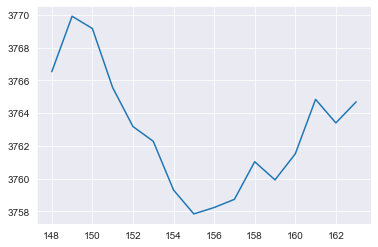

In [201]:
b = a.reset_index().loc[148:163, "Adj Close"]
plt.plot(b)

In [191]:
a = yfinance.download(tickers="^GSPC", start="2022-06-22T12:00:00-04:00", end="2022-06-23", interval="1m")
a

Exception in thread Thread-2027:
Traceback (most recent call last):
  File "/Users/bmartins/.pyenv/versions/3.9.0/lib/python3.9/threading.py", line 950, in _bootstrap_inner
    self.run()
  File "/Users/bmartins/.pyenv/versions/3.9.0/lib/python3.9/threading.py", line 888, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/bmartins/.pyenv/versions/nlp_bert_venv/lib/python3.9/site-packages/multitasking/__init__.py", line 104, in _run_via_pool
    return callee(*args, **kwargs)
  File "/Users/bmartins/.pyenv/versions/nlp_bert_venv/lib/python3.9/site-packages/yfinance/multi.py", line 188, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "/Users/bmartins/.pyenv/versions/nlp_bert_venv/lib/python3.9/site-packages/yfinance/multi.py", line 202, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "/Users/bmartins/.pyenv/versions/nlp_bert_venv/lib/python3.9/site-packages/yfinance/base.p

KeyboardInterrupt: 